In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)
data.shape

(1000, 2)

In [8]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [9]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


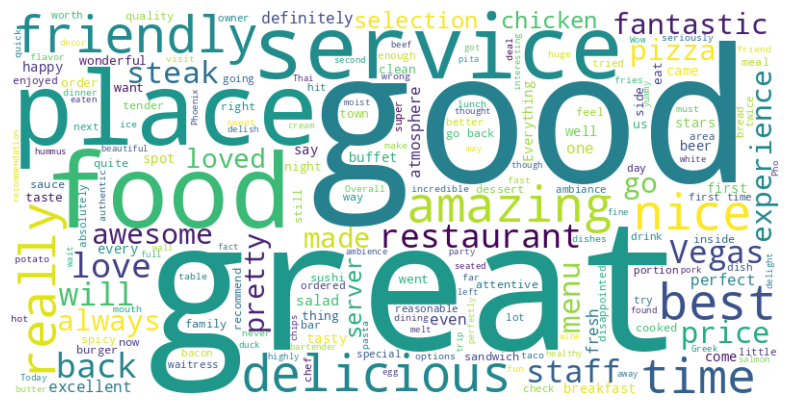

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud=data.loc[data['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])

wordcloud=WordCloud(width=800, height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [12]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [13]:
data.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [14]:
data["Liked"].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [15]:
data['length']=data['Review'].apply(len)
data.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [16]:
data[data['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

Data Preprocessing

In [17]:

import nltk
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [20]:
def text_process(msg):
  nopunc=[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


In [21]:
data.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [22]:
data['tokenized_Review']=data['Review'].apply(text_process)
data.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


In [23]:
corpus = []
for i in range(0,1000):
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])
  review=review.lower()
  review_words = review.split()
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review_words]
  review=' '.join(review)
  corpus.append(review)

In [24]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:, 1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

Model Training

In [28]:
from sklearn.naive_bayes import MultinomialNB

classifier=MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [29]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)
print("------Scores-----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

------Scores-----
Accuracy score is: 76.5%
Precision score is: 76.42%
Recall score is: 78.64%


In [31]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

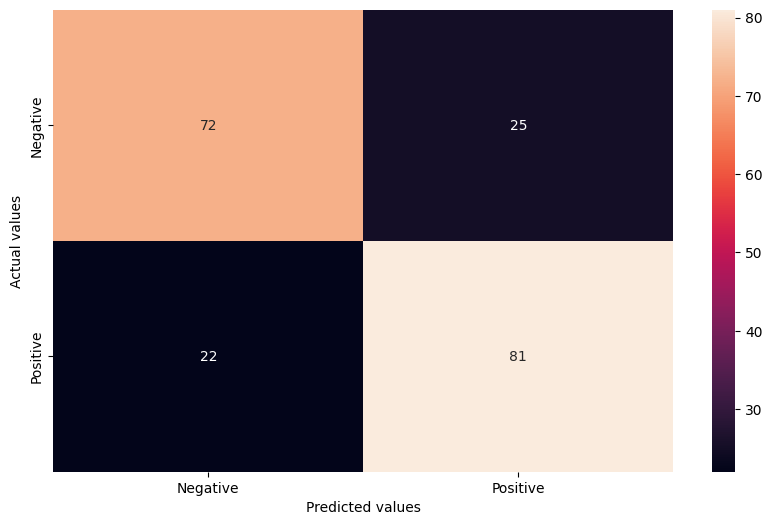

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Hyperparameter tuning the Naive Bayes Classifier

In [33]:
best_accuracy=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier=MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred=temp_classifier.predict(X_test)
  score=accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha is {}%".format(round(best_accuracy*100,2), round(alpha_val,1)))
  if score>best_accuracy:
    best_accuracy=score
    alpha_val=i
print("------------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2), round(alpha_val,1)))

Accuracy score for alpha is 0.0%
Accuracy score for alpha is 78.0%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


Gradient Boosting Classifier Implementation and Accuracy

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
#Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100,random_state=0)
gb_classifier.fit(X_train, y_train)
gb_y_pred= gb_classifier.predict(X_test)
gb_score=accuracy_score(y_test,gb_y_pred)
print("Accuracy score for Gradient Boosting:{}%".format(round(gb_score *100,2)))

Accuracy score for Gradient Boosting:74.0%


Random Forest Classifier Implementation and Accuracy Evaluation

In [37]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the random forest classifier
rf_classifier= RandomForestClassifier(n_estimators=100,random_state=0)
rf_classifier.fit(X_train, y_train)
rf_y_pred= rf_classifier.predict(X_test)
rf_score=accuracy_score(y_test,rf_y_pred)
print("Accuracy score using Random Forest:{}%".format(round(rf_score*100,2)))

Accuracy score using Random Forest:70.0%


Support Vector Machine(SVM) Classifier Implementation and Accuracy Evaluation

In [38]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)

# Calculate and print accuracy
svm_score = accuracy_score(y_test, svm_y_pred)
print("Accuracy score for SVM: {}%".format(round(svm_score * 100, 2)))

Accuracy score for SVM: 72.0%


XGBoost Classifier Implementation and Accuracy Evaluation

In [39]:
import xgboost as xgb

# Initialize and train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)

# Calculate and print accuracy
xgb_score = accuracy_score(y_test, xgb_y_pred)
print("Accuracy score for XGBoost: {}%".format(round(xgb_score * 100, 2)))


Accuracy score for XGBoost: 72.5%


Logistic Regression Classifier Implementation and Accuracy Evaluation

In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)

# Calculate and print accuracy
lr_score = accuracy_score(y_test, lr_y_pred)
print("Accuracy score for Logistic Regression: {}%".format(round(lr_score * 100, 2)))

Accuracy score for Logistic Regression: 71.0%


In [ ]:
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [44]:
def predict_sentiment(sample_review):
  sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_review)
  sample_review=sample_review.lower()
  sample_review_words=sample_review.split()
  sample_review_words= [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review=[ps.stem(word) for word in sample_review_words]
  final_review=' '.join(final_review)
  temp=cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [42]:
# Predicting values


NameError: ignored

In [45]:
sample_review='Food was pretty bad and the service was very late.'

if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [46]:
sample_review='The food is really good.'

if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [47]:
sample_review='Food was pretty absolutely wonderful, from preparation to presentation, very pleasing.'

if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [48]:
sample_review='Food was pretty absolutely wonderful.'

if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [49]:
sample_review='Not tasty and the texture was just nasty'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')
#2.
sample_review='Food was pretty absolutely wonderful, from preparation to presentation, very pleasing.'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')
#3.
sample_review='Food was pretty bad and the service was very late.'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')
#4.
sample_review='Food was pretty absolutely wonderful.'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

#5.
sample_review='food delici spici enough sure ask spicier prefer way'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
This is a POSITIVE review.
This is a NEGATIVE review!
This is a POSITIVE review.
This is a POSITIVE review.
